# This project helps us understand the vulnerability of the person to heart attack, and the factors influencing the heart attack.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

print("All libraries imported")

All libraries imported


#### Importing the Dataset

In [7]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Checking for NULL values

In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Checking for NULL values through visualiztion by creating the heatmap using seaborn library

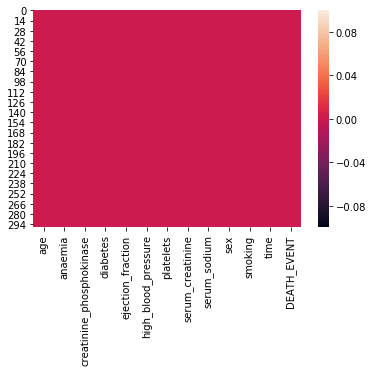

In [13]:
sns.heatmap(df.isnull())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [16]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Number of columns having BInary results

In [21]:
for i in df.columns:
    if df[i].nunique() < 3:
        print(i)

anaemia
diabetes
high_blood_pressure
sex
smoking
DEATH_EVENT


#### Age Distribution plot, from the below curve we observe that the maximum of population age lies between 50 to 70 yrs

In [26]:
fig=ff.create_distplot([df['age'].values],['age'])
fig.update_layout(title_text='Age Distribution plot')
fig.show()

#### Normal serum_sodium ranges between 135-143

In [27]:
fig=ff.create_distplot([df['serum_sodium'].values],['serum_sodium'])
fig.update_layout(title_text='serum_sodium Distribution plot')
fig.show()

#### we are comparing time with death event Blue represents person died and red represents person survived

In [28]:
fig = px.histogram(df, x="time", color="DEATH_EVENT", marginal="box", hover_data=df.columns)
fig.show()

#### Age VS Survival 
#### As we observe from the graph 
#### People between age 50 to 70 survived heart attacks while those between age of 60 to 70 where not able to survive

In [29]:
surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="Analysis in Age on Survival Status")
fig.show()

### Death is mostly due to

#### Gender

#### Diabetes

#### Smoking

##### By plotting all of the these important features with Age column and correlate to Death event

##### Calculating number of people having the diabetes as the factor for their death

In [30]:
fig=px.violin(df,x='diabetes',y='age',color='DEATH_EVENT',points='all',box=True)
fig.update_layout(title_text='Analysis in Age and Diabetes on Survival Status')
fig.show()

In [57]:
fig=px.violin(df,x='sex',y='age',color='DEATH_EVENT',points='all',box=True)
fig.update_layout(title_text='Analysis in Age and Gender on Survival Status')
fig.show()

#### plotting Age and somking with death event( will help us understand the vulnerablity of person (who used to smoke) to death )

In [31]:
fig=px.violin(df,x='smoking',y='age',color='DEATH_EVENT',points='all',box=True)
fig.update_layout(title_text='Analysis in Age and smoking on Survival Status')
fig.show()

In [32]:
fig=px.histogram(df,x='creatinine_phosphokinase',color='DEATH_EVENT',marginal='box')
fig.update_layout(title_text='Analysis of creatinine_phosphokinase wrt Death Event')
fig.show()

In [33]:
fig=px.histogram(df,x='ejection_fraction',color='DEATH_EVENT',marginal='box')
fig.update_layout(title_text='Analysis of ejection_fraction wrt Death Event')
fig.show()

In [34]:
fig=px.histogram(df,x='platelets',color='DEATH_EVENT',marginal='box')
fig.update_layout(title_text='Analysis of platelets wrt Death Event')
fig.show()

In [36]:
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="box", hover_data=df.columns)
fig.update_layout(title_text='Analysis of serum_creatinine wrt Death Event')
fig.show()

In [38]:
fig = px.histogram(df, x="serum_sodium", color="DEATH_EVENT", marginal="box",hover_data=df.columns)
fig.update_layout(title_text='Analysis of serum_sodium wrt Death Event')
fig.show()

#### Detailed plots for calculating survived and death counts

#### Male survival percent - 44.1%

#### Male death percent - 20.7%

#### Female survival percent - 23.7%

#### Female death percent - 11.4%

In [39]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]


labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
          len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Gender")
fig.show()

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [40]:
diabetes = df[df["diabetes"]==1]["age"]
not_diabetes = df[df["diabetes"]==0]["age"]
hist_data = [diabetes,not_diabetes]
group_labels = ['Diabetes', 'Not having Diabetes']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="Analysis in Age on Diabetes Status")
fig.show()

In [41]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()


In [42]:
yes_diabetes=df[df['diabetes']==1]
no_diabetes=df[df['diabetes']==0]

dia_deaths=yes_diabetes[df['DEATH_EVENT']==1]
dia_live=yes_diabetes[df['DEATH_EVENT']==0]
no_dia_deaths=no_diabetes[df['DEATH_EVENT']==1]
no_dia_live=no_diabetes[df['DEATH_EVENT']==0]
labels=['died having diabetes','survived having diabetes','died not having diabetes','survived not having diabetes']
values=[len(dia_deaths),len(dia_live),len(no_dia_deaths),len(no_dia_live)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text='testing')
fig.show()

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



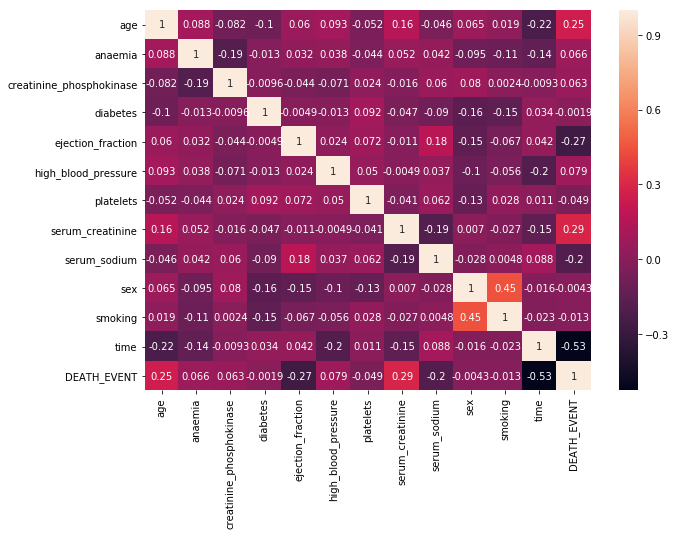

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [44]:
X=X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Models

In [46]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("testing Score:\n",model.score(X_test,y_test)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print(model.get_params())

Classification Report is:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

   micro avg       0.75      0.75      0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Confusion Matrix:
 [[33  2]
 [13 12]]
testing Score:
 75.0
Mean Squared Error:
 0.25
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [51]:
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("testing Score:\n",model.score(X_test,y_test)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print(model.get_params())

Classification Report is:
               precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

   micro avg       0.58      0.58      0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60

Confusion Matrix:
 [[35  0]
 [25  0]]
testing Score:
 58.333333333333336
Mean Squared Error:
 0.4166666666666667
{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("testing Score:\n",dtree.score(X_test,y_test)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.61      0.44      0.51        25

   micro avg       0.65      0.65      0.65        60
   macro avg       0.64      0.62      0.62        60
weighted avg       0.64      0.65      0.64        60

Confusion Matrix:
 [[28  7]
 [14 11]]
testing Score:
 65.0
Mean Squared Error:
 0.35


In [53]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print(model.get_params())
print('accuracy score',accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.61      0.44      0.51        25

   micro avg       0.65      0.65      0.65        60
   macro avg       0.64      0.62      0.62        60
weighted avg       0.64      0.65      0.64        60

Confusion Matrix:
 [[28  7]
 [14 11]]
Training Score:
 98.74476987447699
Mean Squared Error:
 0.35
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
accuracy score 65.0


/Users/ganeshsa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [54]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print(model.get_params())
print('accuracy score',accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

   micro avg       0.72      0.72      0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60

Confusion Matrix:
 [[31  4]
 [13 12]]
Training Score:
 100.0
Mean Squared Error:
 0.2833333333333333
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
accuracy score 71.66666666666667
